In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/netflix-tv-shows-and-movies/credits.csv
/kaggle/input/netflix-tv-shows-and-movies/titles.csv


## Preparing Jovian

In [2]:
# Jovian Commit Essentials
# Please retain and execute this cell without modifying the contents for `jovian.commit` to work
!pip install jovian --upgrade -q
import jovian
jovian.set_project('zerotopandas-course-project-starter-aad63')
jovian.set_colab_id('1CRvfXMHWpWPLWrWiI9grHVZNzCbGj5Y_')

<IPython.core.display.Javascript object>

In [3]:
!pip install jovian opendatasets --upgrade --quiet

In [4]:
project_name = "zerotopandas-exploratory-data-analysis" # change this (use lowercase letters and hyphens only)
!pip install jovian --upgrade -q
import jovian
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"


In [5]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Data Preparation and Cleaning
- We will verify that the data is valid 
- Delete rows with incorrect data

First, we will load data then merge credits columns with titles columns for better analysis and understading

In [6]:
df = pd.read_csv("../input/netflix-tv-shows-and-movies/titles.csv")
df =df.merge(pd.read_csv('../input/netflix-tv-shows-and-movies/credits.csv'),on='id')
df.sample(10)

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score,person_id,name,character,role
24129,tm206512,Circle,MOVIE,"In a massive, mysterious chamber, fifty strang...",2015,NaN,87,"['scifi', 'thriller', 'horror', 'drama', 'euro...",['US'],NaN,tt4473464,6.0,52925.0,12.217,6.0,249159,Aaron Hann,NaN,DIRECTOR
54417,ts86927,Touch Your Heart,SHOW,"Hoping to make a comeback after a bad scandal,...",2019,TV-MA,63,"['comedy', 'drama', 'romance']",['KR'],1.0,tt9466990,7.7,3046.0,22.616,8.4,728226,Park Kyung-hye,Dan Mun-hui,ACTOR
18852,tm161029,Mr. Peabody & Sherman,MOVIE,"A young boy and his dog, who happens to have a...",2014,PG,92,"['action', 'family', 'animation', 'history', '...",['US'],NaN,tt0864835,6.8,68790.0,30.690,6.7,108780,Rosemary Alexander,Additional Voices (voice),ACTOR
537,tm14350,Alexandria… Why?,MOVIE,Set against the panoramic backdrop of war-torn...,1979,NaN,133,['drama'],['EG'],NaN,tt0077751,7.2,1689.0,1.736,6.0,173191,Youssef Chahine,NaN,DIRECTOR
30278,tm232500,The Disaster Artist,MOVIE,An aspiring actor in Hollywood meets an enigma...,2017,R,104,"['comedy', 'drama']",['US'],NaN,tt3521126,7.3,149604.0,13.876,7.1,806609,Nicole Gordon-Levitt,Girl in Red Dress (uncredited),ACTOR
31371,tm346943,Kodachrome,MOVIE,Matt Ryder is convinced to drive his estranged...,2017,NaN,105,"['drama', 'comedy', 'european']",['US'],NaN,tt1880399,6.8,16482.0,7.996,6.8,3832,Dennis Haysbert,Larry,ACTOR
75665,tm810657,Uppena,MOVIE,Aasi has been in love with Bebamma since their...,2021,NaN,147,['drama'],['IN'],NaN,NaN,NaN,NaN,2.920,6.3,124354,Ravi Varma,Rayanam's henchman,ACTOR
34479,ts84243,Baby,SHOW,"Fed up with their families and classmates, two...",2018,TV-MA,45,['drama'],['IT'],3.0,tt7645192,6.8,10990.0,49.167,8.0,140821,Claudia Pandolfi,Monica Petrelli Younes,ACTOR
38237,ts84346,Falsa identidad,SHOW,"Isabel and Diego, two complete strangers, must...",2018,TV-14,43,"['action', 'thriller', 'crime', 'drama']","['US', 'MX']",2.0,tt8598690,7.0,351.0,172.609,7.5,322837,Sonya Smith,Fernanda Virrueta,ACTOR
74450,ts287941,Racket Boys,SHOW,A story of a boys' badminton team at a middle ...,2021,TV-14,70,"['comedy', 'family', 'drama', 'sport']",['KR'],1.0,tt14482414,1.8,27484.0,3.427,8.0,59294,Kim Sang-kyung,Yoon Hyun-jong,ACTOR


Data frame has 77213 rows and 19 columns

In [7]:
df.shape

(77213, 19)

After trying to find missing values 
we found alot of missing data 
like in 'seasons'

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 77213 entries, 0 to 77212
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    77213 non-null  object 
 1   title                 77212 non-null  object 
 2   type                  77213 non-null  object 
 3   description           77160 non-null  object 
 4   release_year          77213 non-null  int64  
 5   age_certification     46595 non-null  object 
 6   runtime               77213 non-null  int64  
 7   genres                77213 non-null  object 
 8   production_countries  77213 non-null  object 
 9   seasons               13976 non-null  float64
 10  imdb_id               73388 non-null  object 
 11  imdb_score            72937 non-null  float64
 12  imdb_votes            72850 non-null  float64
 13  tmdb_popularity       77202 non-null  float64
 14  tmdb_score            76093 non-null  float64
 15  person_id          

## Handling missing values

'seasons' column has alot of missing values so , it will be deleted

In [9]:
df.drop('seasons',axis=1,inplace = True)

then we will drop all null valuse in our dataset
we lost alot of data, after droping null values 
but we still have good amounf for our analysis

In [10]:
df=df.dropna()

Making sure there is no null values

In [11]:
df.isna().sum()

id                      0
title                   0
type                    0
description             0
release_year            0
age_certification       0
runtime                 0
genres                  0
production_countries    0
imdb_id                 0
imdb_score              0
imdb_votes              0
tmdb_popularity         0
tmdb_score              0
person_id               0
name                    0
character               0
role                    0
dtype: int64

## Explorator Analysis and Visualization
we will explore out data to find min and max and std
most repeated valuse and so on

In [12]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

find mean and std and other statistics of runtime, votes and popularity

In [13]:
df.describe()[['runtime','imdb_votes','tmdb_popularity']]

,runtime,imdb_votes,tmdb_popularity
count,41251.000000,4.125100e+04,41251.000000
mean,95.482000,9.455832e+04,35.032964
std,37.860817,1.937883e+05,67.076239
min,0.000000,5.000000e+00,0.600000
25%,76.000000,4.649000e+03,10.782000
50%,100.000000,2.446800e+04,17.730000
75%,120.000000,1.110920e+05,34.763000
max,229.000000,2.268288e+06,1455.085000


using hostogram to know which year has most movies release
answer is 2020

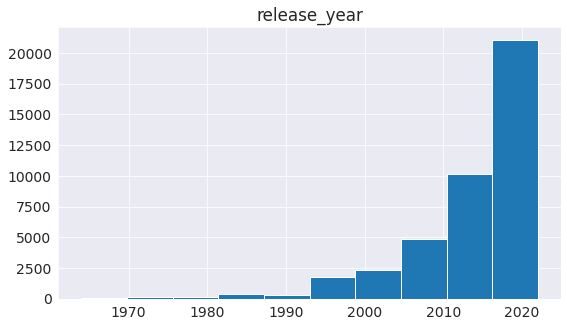

In [14]:
df.hist('release_year');

using histogarm to know average score movies has got
answer is about 7

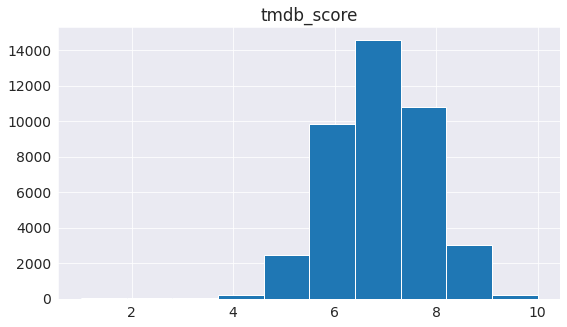

In [15]:
df.hist('tmdb_score');

exploring runtime average of movies
and it is between 120 and 140

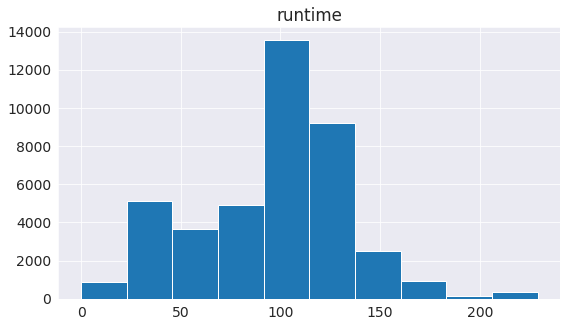

In [16]:
df.drop_duplicates().hist('runtime');

# Ask and Answer Questions
asking some questions to answer, and know more from data

## Q1: What is Average runtime of movies
answer : average runtime is 72.5 minutes

In [17]:
df[['id','type','runtime']].drop_duplicates()[['runtime']].describe()

# max runtime is 229 minutes
# std is 40.5 minutes

,runtime
count,2587.000000
mean,72.634712
std,40.418450
min,0.000000
25%,41.000000
50%,65.000000
75%,103.000000
max,229.000000


## Q2: What movies Bryan Cranston Did?

In [18]:
# df[df['title'] == "Breaking Bad"]
df[df['name'] == 'Bryan Cranston'][['title','release_year','imdb_score','character']]


,title,release_year,imdb_score,character
1950,Saving Private Ryan,1998,8.6,War Department Colonel
4564,Breaking Bad,2008,9.5,Walter White
13841,Argo,2012,7.7,Jack O'Donnell
14398,Contagion,2011,6.8,Lyle Haggerty
14968,Total Recall,2012,6.2,Cohaagen
21988,Kung Fu Panda 3,2016,7.1,Li Shan (voice)
30259,The Disaster Artist,2017,7.3,Himself (uncredited)
46970,El Camino: A Breaking Bad Movie,2019,7.3,Walter White


## Q3: Does the year of release affect the runtime of the film?
or what is average movies time by year
answer: num of movies per year affect values of mean values, so answer is not effective
answer: runtime of old movies are all in haight average, not like 2020 movies has hight range runtime

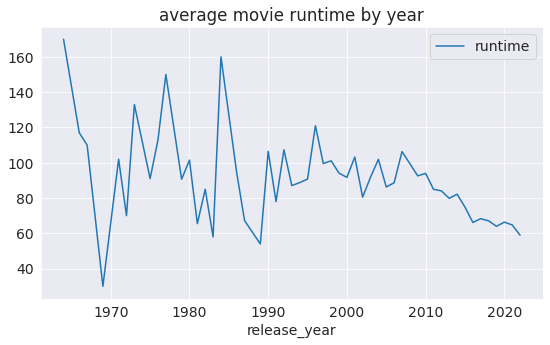

In [19]:
df[['title','release_year','runtime']].drop_duplicates().groupby('release_year')[['runtime']].mean().plot()
plt.title('average movie runtime by year');

## Q4: what is heighest imdb_score ( Most 10 liked movies )
answer: most liked movie is Breaking Bad in 2008 and runtime is 48 minutes with score 9.5

In [20]:
df[['title','release_year','runtime','imdb_score']].drop_duplicates().sort_values(['imdb_score'],ascending = False).head(10)

,title,release_year,runtime,imdb_score
4564,Breaking Bad,2008,48,9.5
4818,Avatar: The Last Airbender,2005,24,9.3
49003,Our Planet,2019,50,9.3
56635,Kota Factory,2019,42,9.3
33760,My Mister,2018,79,9.2
69642,Who Rules The World,2022,44,9.2
25206,Reply 1988,2015,95,9.2
66142,Arcane,2021,41,9.1
46184,The Last Dance,2020,50,9.1
22515,Leah Remini: Scientology and the Aftermath,2016,46,9.0


## Q5: what is Lowest imdb_score ( Most 10 liked movies )
answer: Lowest liked movie is Aerials in 2016 and runtime is 90 minutes with score 1.5

In [21]:
df[['title','release_year','runtime','imdb_score']].drop_duplicates().sort_values(['imdb_score'],ascending = False).dropna().tail(10)

,title,release_year,runtime,imdb_score
65787,Luccas Neto in: Summer Camp,2019,87,2.8
57614,The Goop Lab,2020,33,2.5
68974,Cosmic Sin,2021,88,2.5
60298,Bobbleheads: The Movie,2020,82,2.4
74063,Hype House,2022,32,2.3
44043,A House of Blocks,2017,84,2.3
40980,Nothing to Lose,2018,130,2.3
16776,FRED 3: Camp Fred,2012,81,2.0
74444,Racket Boys,2021,70,1.8
69914,He's Expecting,2022,26,1.6


## Q6: Will the launch year affect the number of votes?
answer: movies after 2010 gets more num of number of votes
maybe after 2020 data are not for full year

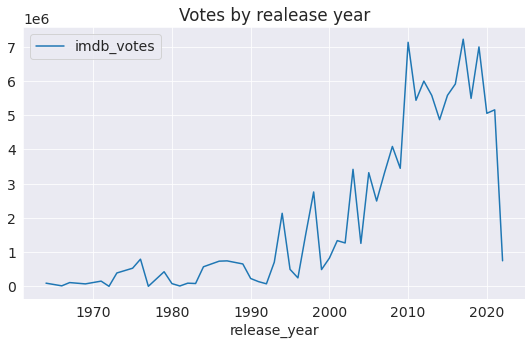

In [22]:
df[['title','release_year','runtime','imdb_score','imdb_votes']].drop_duplicates().groupby('release_year')[['imdb_votes']].sum().plot();
plt.title('Votes by realease year');

## Inferences and Conclusion
- we loaded data from kaggle (Netflex movies)
- cleaned data and deleted season column as it has many null values
- visualize data to understant it clearly
- asked some questoins about data and clearly answered them

we found that average movies runtime is 72.5 , Bryan Cranston did many good movies and did best movie (Breaking Bad) , in past years people are voting and caring about voting

## References and Future Work

Data loaded from kaggle
https://www.kaggle.com/datasets/victorsoeiro/netflix-tv-shows-and-movies

In [23]:
import jovian


In [24]:
jovian.commit()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[jovian] Error: Failed to read the Jupyter notebook. Please re-run this cell to try again. If the issue persists, provide the "filename" argument to "jovian.commit" e.g. "jovian.commit(filename='my-notebook.ipynb')"
